In [31]:
import os, ctypes
from scipy import integrate, LowLevelCallable
import numpy as np
import matplotlib.pyplot as plt
import copy 
import scipy as sp
lib = ctypes.CDLL(os.path.abspath('testlib.so'))
lib.f.restype = ctypes.c_double
lib.f.argtypes = (ctypes.c_int, ctypes.POINTER(ctypes.c_double),
                  ctypes.c_void_p)

c = ctypes.c_double(1.0)
user_data = ctypes.cast(ctypes.pointer(c), ctypes.c_void_p)

func = LowLevelCallable(lib.f, user_data)

In [3]:
integrate.nquad(func, [[0, 10], [-10, 0], [-1, 1]])

(1200.0000000000002, 1.3322676295501882e-11)

/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:21: RuntimeWarning: divide by zero encountered in log
  n = np.log(hist_data[0])  #numbers in each bin
/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:30: RuntimeWarning: invalid value encountered in double_scalars
  slope = (n[i + 1] - n[i]) / (bins[i + 1] - bins[i])


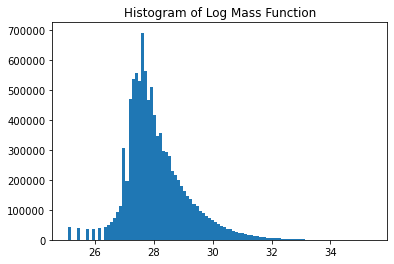

In [20]:
from mass_function import MassFunction
mf = MassFunction()
%run /global/project/projectdirs/des/zhou/spt_selection/header.py

In [21]:
lnM = np.log(mf.mass)
nh = len(lnM)

(array([2.77300e+05, 1.53682e+05, 8.18420e+04, 4.11570e+04, 1.91360e+04,
        7.75400e+03, 2.57200e+03, 7.13000e+02, 9.20000e+01, 9.00000e+00]),
 array([29.93603 , 30.483715, 31.031399, 31.579084, 32.12677 , 32.674454,
        33.22214 , 33.769825, 34.31751 , 34.865196, 35.41288 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

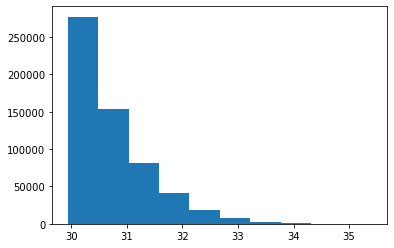

In [22]:
plt.hist(lnM)

In [23]:
lnMwl_mean = copy.deepcopy(lnM)
lnlam_mean = alpha_lam * lnM + pi_lam
lnSZ_mean = alpha_SZ * lnM + pi_SZ

In [24]:
from monte_carlo_observable import MonteCarloObservables

mco = MonteCarloObservables(nh,
                            0.5,
                            np.log(mf.mass),
                            lnlam_mean=lnlam_mean,
                            lnSZ_mean=lnSZ_mean,
                            lnMwl_mean=lnMwl_mean,
                            scatter_lam=scatter_lam,
                            scatter_Mwl=scatter_Mwl,
                            scatter_SZ=scatter_SZ,
                            mf_slope_interp=mf.beta)
NBINS = 1

In [35]:
mco.lnlam
data = np.ma.masked_outside(mco.lnlam,np.log(20)/2,np.log(30)).compressed()

(array([44143., 35726., 27899., 21844., 16902., 13023.,  9721.,  7289.,
         5513.,  3858.]),
 array([1.49786633, 1.68819792, 1.87852951, 2.0688611 , 2.25919268,
        2.44952427, 2.63985586, 2.83018745, 3.02051903, 3.21085062,
        3.40118221]),
 <BarContainer object of 10 artists>)

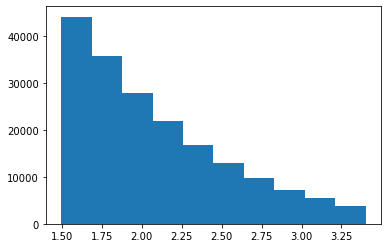

In [36]:
plt.hist(data)

In [37]:
kde = sp.stats.gaussian_kde(data)

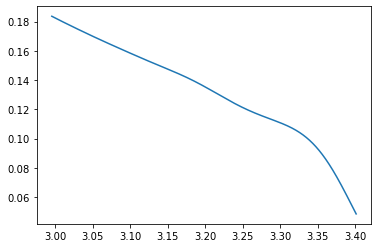

In [38]:
plt.plot(np.linspace(np.log(20), np.log(30), 10000),
         kde.evaluate(np.linspace(np.log(20), np.log(30), 10000)))

In [39]:
plt.plot(np.linspace(np.log(20), np.log(30), 1000),
         kde.pdf(np.linspace(np.log(20), np.log(30), 1000)))